In [1]:
%matplotlib inline
from __future__ import division, print_function

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from folder_manipulations import mkdir_p
import gc_colors
import pandas as pd
import glob
import re
import os 
import TBFunctions as TB
import danplotlib as dpl
import numpy as np
import scipy.stats as stats
import root_pandas as rp
import rootpy.ROOT as ROOT
from rootpy.io import root_open

plt.style.use("presentation")
gc_colors.update_colorcycle()

# List all available PACIFIC files

In [2]:
Files_PACIFIC = TB.Files_DF("/auto/data/berninghoff/tb2017_1_Output/Preselection/*/wClusters/*.h5")
Files_PACIFIC.iloc[:,:0:-1]

Filename_short  Position  ThSetting  IntSetting  \
0   2.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
1   2.0GeV_setting4.1_000mm_1_noComment.h5         0          1           4   
2   6.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
3   5.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
4   3.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
5   4.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
6   1.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
7   2.0GeV_setting4.3_000mm_1_noComment.h5         0          3           4   
8   2.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
9   2.0GeV_setting4.1_000mm_1_noComment.h5         0          1           4   
10  6.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
11  5.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
12  3.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
13  4.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
14  1.0GeV_setting4.2_000mm_1_noComment.h5         0          2           4   
15  2.0GeV_setting4.3_000mm_1_noComment.h5         0          3           4   

    Beamenergy  Layer  
0            2      0  
1            2      0  
2            6      0  
3            5      0  
4            3      0  
5            4      0  
6            1      0  
7            2      0  
8            2      1  
9            2      1  
10           6      1  
11           5      1  
12           3      1  
13           4      1  
14           1      1  
15           2      1

# Select file(s) and read in data

In [11]:
Files_PACIFIC_sel = Files_PACIFIC.query("Beamenergy == 2 and Position == 0 and IntSetting == 4 and Layer == 0")
Files_PACIFIC_sel = Files_PACIFIC_sel.sort_values("ThSetting")

Files_PACIFIC_data = TB.read_HDFs(Files_PACIFIC_sel, 
                                  selection="Finetiming >= 12 and Finetiming <= 24 and BXing == 1")

Files_PACIFIC_data

Reading in data from /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.1_000mm_1_noComment.h5
Cluster algorithms []
Reading in data from /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.2_000mm_1_noComment.h5
Cluster algorithms []
Reading in data from /auto/data/berninghoff/tb2017_1_Output/Preselection/Layer_0/wClusters/tb2017_1_pacific_2.0GeV_setting4.3_000mm_1_noComment.h5
Cluster algorithms []


Filename  Layer  Beamenergy  \
1  /auto/data/berninghoff/tb2017_1_Output/Presele...      0           2   
0  /auto/data/berninghoff/tb2017_1_Output/Presele...      0           2   
7  /auto/data/berninghoff/tb2017_1_Output/Presele...      0           2   

   IntSetting  ThSetting  Position                          Filename_short  \
1           4          1         0  2.0GeV_setting4.1_000mm_1_noComment.h5   
0           4          2         0  2.0GeV_setting4.2_000mm_1_noComment.h5   
7           4          3         0  2.0GeV_setting4.3_000mm_1_noComment.h5   

                                           Dataframe  
1          Evt_num     Run_num   Timestamp  Integ...  
0          Evt_num     Run_num    Timestamp  Inte...  
7          Evt_num     Run_num    Timestamp  Inte...

# Read in data from Snow's integrator studies

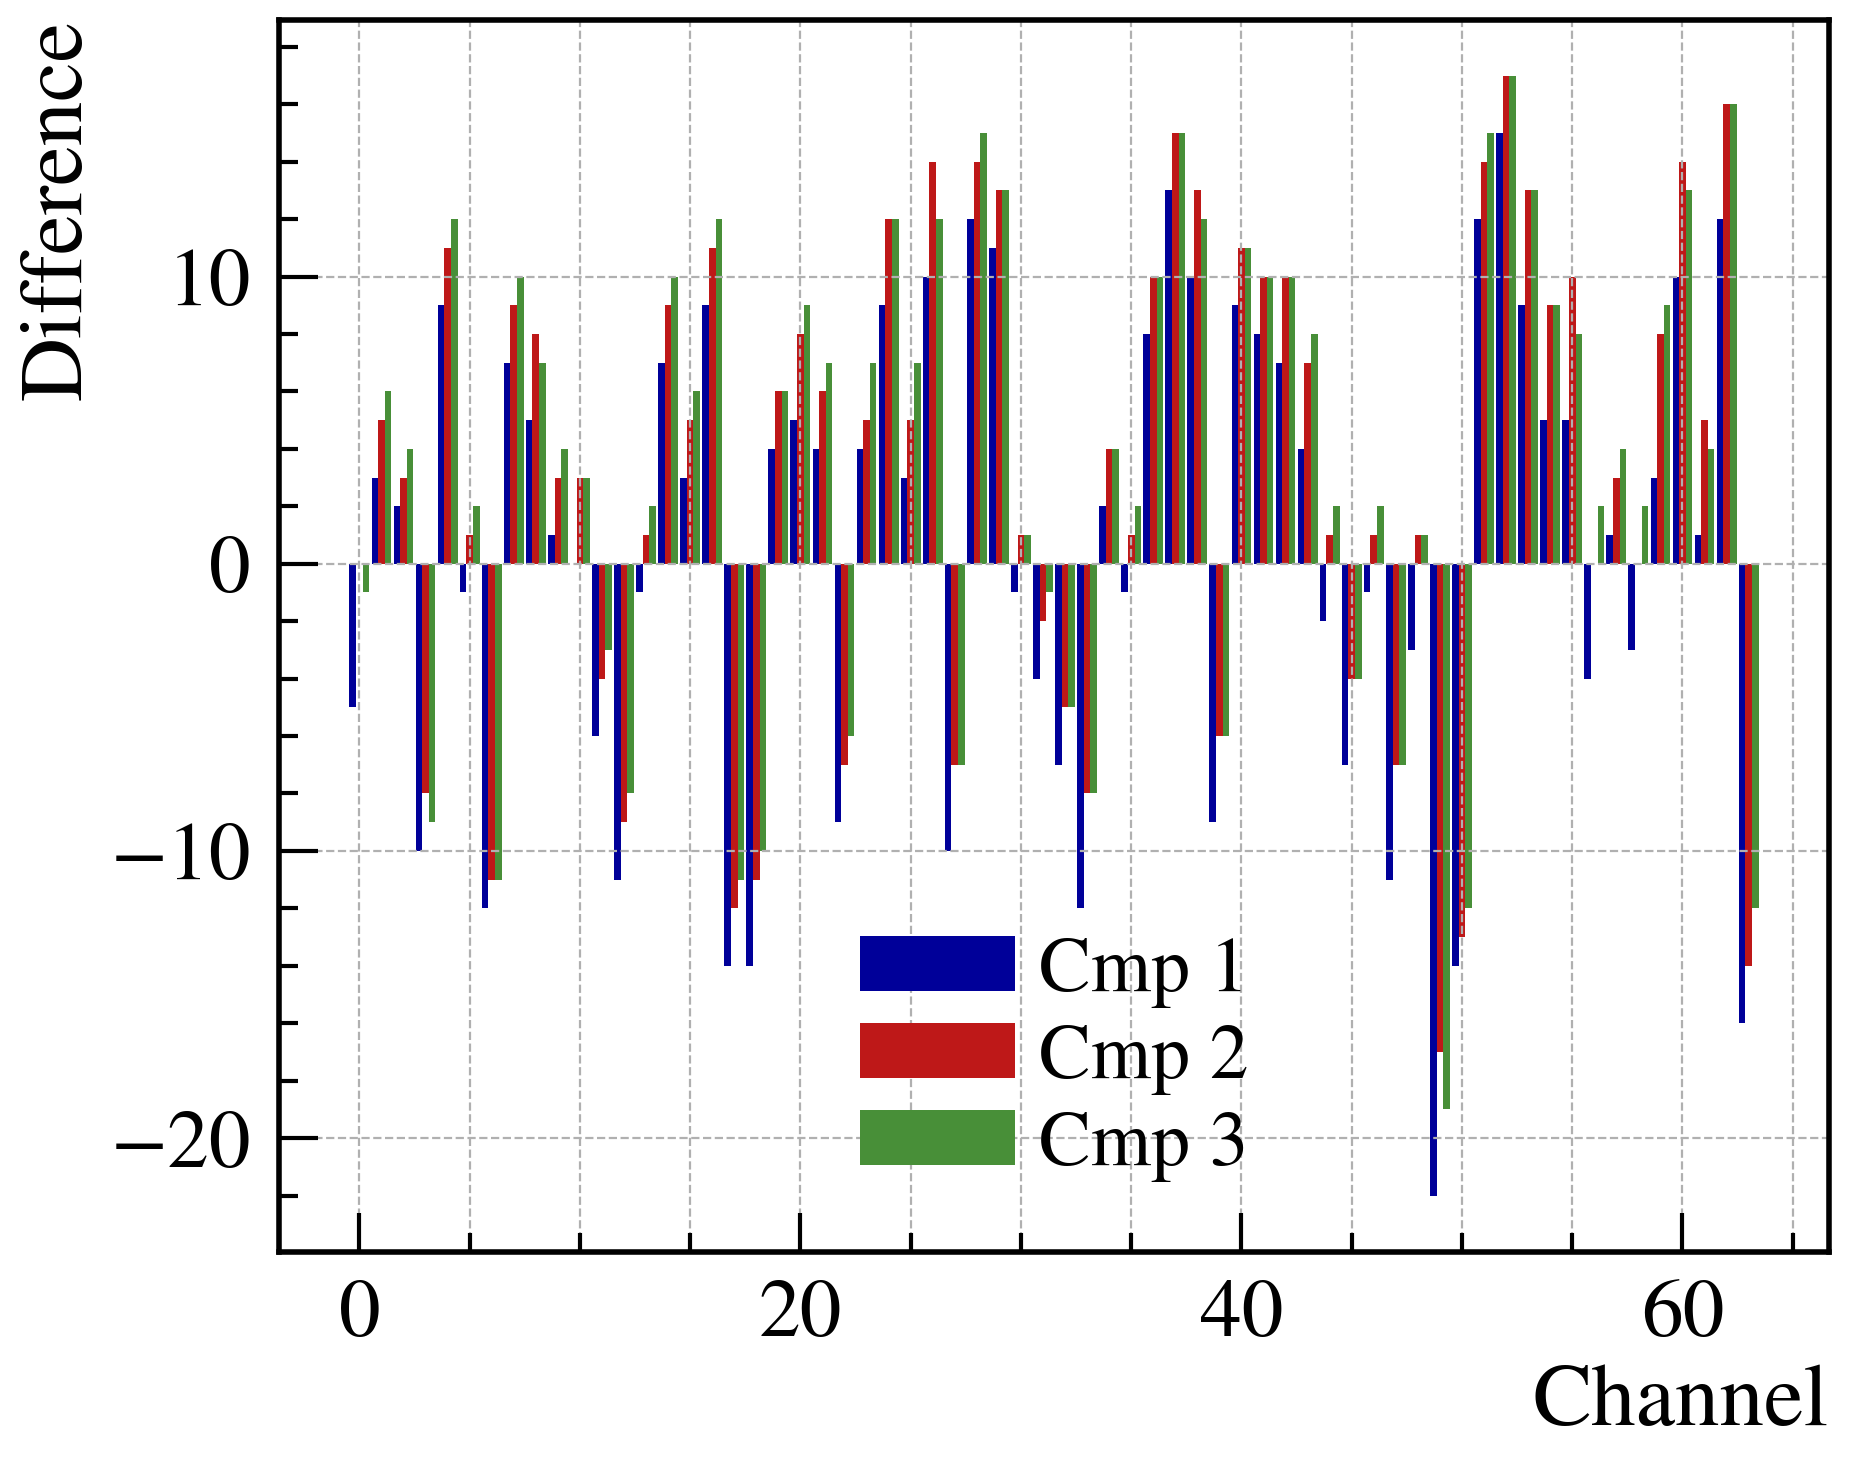

1   2   3
Channel            
0        -5   0  -1
1         3   5   6
2         2   3   4
3       -10  -8  -9
4         9  11  12
5        -1   1   2
6       -12 -11 -11
7         7   9  10
8         5   8   7
9         1   3   4
10        0   3   3
11       -6  -4  -3
12      -11  -9  -8
13       -1   1   2
14        7   9  10
15        3   5   6
16        9  11  12
17      -14 -12 -11
18      -14 -11 -10
19        4   6   6
20        5   8   9
21        4   6   7
22       -9  -7  -6
23        4   5   7
24        9  12  12
25        3   5   7
26       10  14  12
27      -10  -7  -7
28       12  14  15
29       11  13  13
...      ..  ..  ..
34        2   4   4
35       -1   1   2
36        8  10  10
37       13  15  15
38       10  13  12
39       -9  -6  -6
40        9  11  11
41        8  10  10
42        7  10  10
43        4   7   8
44       -2   1   2
45       -7  -4  -4
46       -1   1   2
47      -11  -7  -7
48       -3   1   1
49      -22 -17 -19
50      -14 -13 -12
51       12  14  15
52       15  17  17
53        9  13  13
54        5   9   9
55        5  10   8
56       -4   0   2
57        1   3   4
58       -3   0   2
59        3   8   9
60       10  14  13
61        1   5   4
62       12  16  16
63      -16 -14 -12

[64 rows x 3 columns]

In [48]:
File = ROOT.TFile("/auto/data/berninghoff/tb2017_1_Output/pacific009_integrator_summary.root", "READ")
Cmp_Differences = pd.DataFrame(index=range(64))
Cmp_Differences.index.name="Channel"

#plt.figure(figsize=(20,8))
for Cmp in [1,2,3]:
    graph = File.Get("Difference between two integrators: cmp {}".format(Cmp))
    buff = graph.GetY()
    buff.SetSize(graph.GetN())
    arr = np.array(buff, copy=True, dtype=int)
    Cmp_Differences[Cmp] = arr
    
    #Control plot
    width=0.3
    plt.bar(np.arange(64)-2*width+width*Cmp, arr, width=width, label="Cmp {}".format(Cmp))
    
dpl.xlabel("Channel")
dpl.ylabel("Difference")
plt.legend()
plt.minorticks_on()
plt.grid(axis="x", which="both", ls="--")
plt.grid(axis="y", which="major", ls="--")
plt.show()
plt.close()

Cmp_Differences